In [1]:
import seaborn as sns
import pandas as pd 
import nbformat

In [2]:
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('tips')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# scatter - 산점도

상관관계 시각화 - 분포, 경향성, 이상치 탐색
- 회귀분석, 군집분석, 

<Axes: xlabel='total_bill', ylabel='tip'>

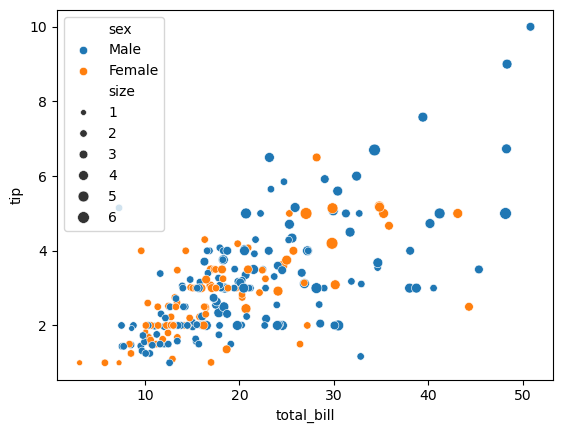

In [4]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['sex'], size=df['size'])

In [5]:
df = pd.read_csv('data/global_internet_users.csv')
df

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.000000,0.000000,0,0.000000
1,1,Afghanistan,AFG,1981,0.000000,0.000000,0,0.000000
2,2,Afghanistan,AFG,1982,0.000000,0.000000,0,0.000000
3,3,Afghanistan,AFG,1983,0.000000,0.000000,0,0.000000
4,4,Afghanistan,AFG,1984,0.000000,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...
8862,8862,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633
8863,8863,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694
8864,8864,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322
8865,8865,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818


InvalidIndexError: (slice(None, None, None), slice(None, None, None))

<Axes: xlabel='Year', ylabel='No. of Internet Users'>

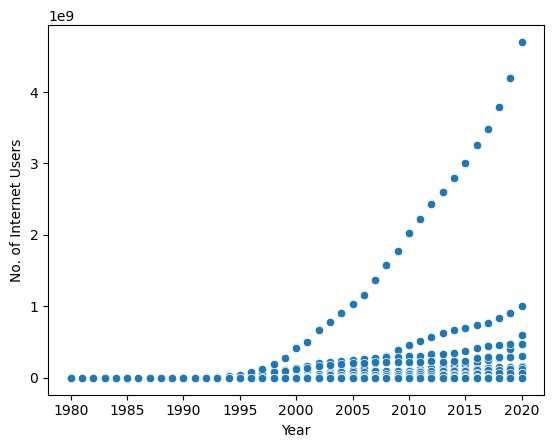

In [ ]:
sns.scatterplot(x='Year', y='No. of Internet Users', data=df)

In [ ]:
df.Entity.unique() # 국가

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia and Pacific', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe and Central Asia',
    

In [ ]:
#Entitiy 가 너무 많아서 따로 선택
enti = ['South Korea', 'Japan','China']
df_country = df.loc[df['Entity'].isin(enti)]
df_country.head(2)

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
1579,1579,China,CHN,1980,0.0,0.0,0,0.0
1580,1580,China,CHN,1981,0.0,0.0,0,0.0


<Axes: xlabel='Year', ylabel='No. of Internet Users'>

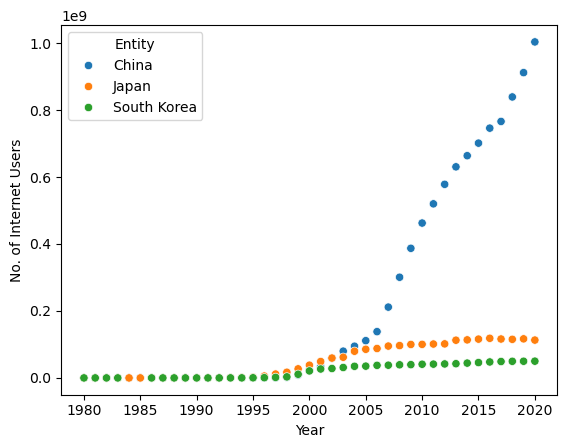

In [ ]:
# 연도별 사용자 - 국가/지역 별로 구분해서 시각화 

sns.scatterplot(x='Year', y='No. of Internet Users',data=df_country,
                hue='Entity'
                # ,markers=['o','^','x'], s=100, style='Entity' 
                )

# plotly

In [ ]:
import plotly.express as px
import nbformat

fig = px.scatter(
    data_frame=df , x='Year', y='No. of Internet Users', width=400, height=400
)
fig.show()

In [ ]:
color = px.colors.qualitative.Light24
px.scatter(
    data_frame=df , x='Year', y='No. of Internet Users', 
    width=400, height=400, color='Entity', color_discrete_sequence=color, symbol='Entity',
    size='No. of Internet Users'
)

산점도는 데이터의 양에 따라 효과가가 달라진다.   
size 그룹간 차이 식별이 어려워질 수 있다.    
최대 두개 정도만 구분 - 

# regplot

In [ ]:
tip_df = sns.load_dataset('tips')
tip_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<Axes: xlabel='total_bill', ylabel='tip'>

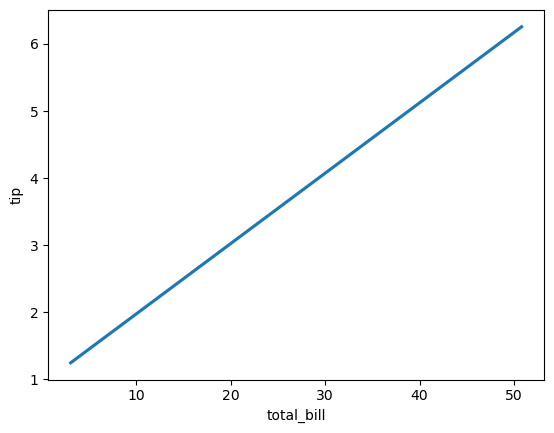

In [ ]:
sns.regplot(x='total_bill', y='tip', data=tip_df, scatter=False, ci=None)

In [ ]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# plotly에서 regplot 그리기 ㅋㅋ ㅠ 

px.scatter(
    data_frame=tip_df,   # 사용할 데이터프레임
    x='total_bill',      # x축에 사용할 컬럼
    y='tip',             # y축에 사용할 컬럼
    width=400,           # 그래프 가로 크기(px 단위)
    height=400,          # 그래프 세로 크기(px 단위)
    trendline='ols',     # 회귀선 추가 (최소자승법, ordinary least squares)
    color='smoker'       # 색 구분 기준 (범주형 변수)
)

# lineplot

(x,y) 점들을 이어주는 형식으로 데이터의 추세를 확인하는 용도로 활용됩니다.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16600\2581566319.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.




<Axes: xlabel='size', ylabel='tip'>

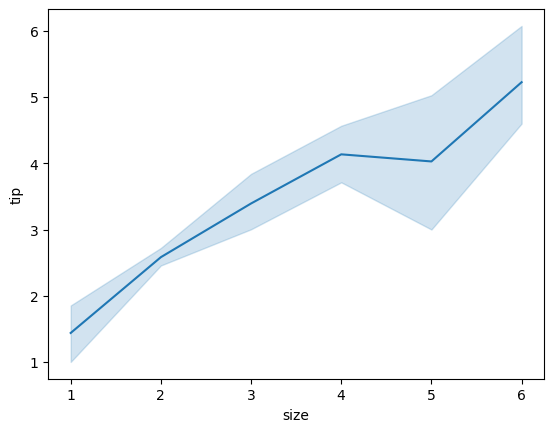

In [ ]:
sns.lineplot(x='size', y='tip', data=tip_df, ci=90)

In [ ]:
users_df = df 
df_country[:5]

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
1579,1579,China,CHN,1980,0.0,0.0,0,0.0
1580,1580,China,CHN,1981,0.0,0.0,0,0.0
1581,1581,China,CHN,1982,0.0,0.0,0,0.0
1582,1582,China,CHN,1983,0.0,0.0,0,0.0
1583,1583,China,CHN,1984,0.0,0.0,0,0.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_16600\4187187681.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.




<Axes: xlabel='Year', ylabel='No. of Internet Users'>

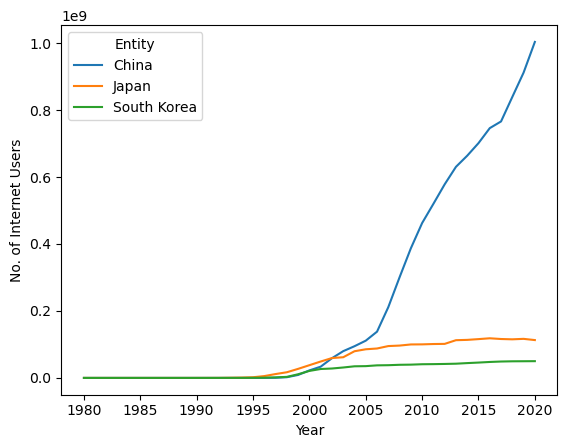

In [ ]:
sns.lineplot(  y='No. of Internet Users'
             , x='Year', data=df_country
             , ci=90
             , hue='Entity')


<Axes: xlabel='Year', ylabel='No. of Internet Users'>

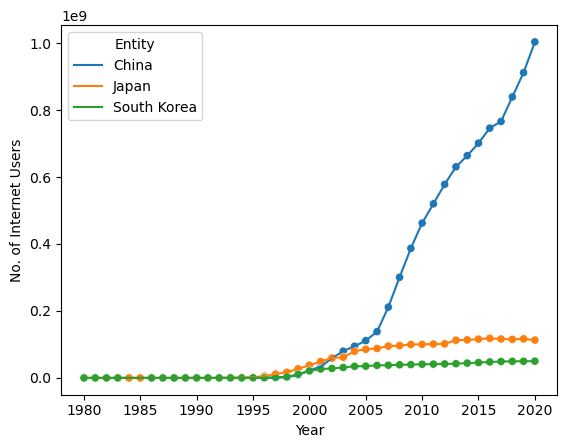

In [ ]:
# scattrer(산점도) + lineplot(라인차트) 를 같이 보는 경우가 많음 
#추세 데이터 양을 함께 확인할 수 있다 

# 선 그래프 (Line Plot): 시간에 따른 추세를 선으로 연결
sns.lineplot(
    y='No. of Internet Users',   # y축: 인터넷 사용자 수
    x='Year',                    # x축: 연도
    data=df_country,             # 사용할 데이터프레임
    hue='Entity'                 # 색상으로 나라(Entity) 구분
)

# 산점도 (Scatter Plot): 개별 데이터 점을 표시
sns.scatterplot(
    y='No. of Internet Users',   # y축: 인터넷 사용자 수
    x='Year',                    # x축: 연도
    data=df_country,             # 사용할 데이터프레임
    hue='Entity',                # 색상으로 나라(Entity) 구분
    legend=False                 # 색상 설명(범례)을 숨김
)

In [ ]:
import plotly.express as px

px.line(
    data_frame=df_country,        # 사용할 데이터프레임 (표 형태 데이터)
    x='Year',                     # x축: 연도
    y='No. of Internet Users',    # y축: 인터넷 사용자 수
    width=400,                    # 그래프 가로 크기 (픽셀 단위)
    height=400,                   # 그래프 세로 크기 (픽셀 단위)
    line_dash='Entity',           # 나라(Entity)에 따라 선 스타일(실선, 점선 등) 구분
    color='Entity',               # 나라(Entity)에 따라 선 색상 구분
    symbol='Entity'               # 나라(Entity)에 따라 데이터 점 모양 구분 (원, 네모, 삼각형 등)
)


# boxplot 

이상치 탐지, 통계량 확인, 분포 확인 

In [ ]:
ev_df = pd.read_csv('data/EV_charge.csv')
ev_df.head(3)
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       3395 non-null   int64  
 1   kwhTotal        3395 non-null   float64
 2   dollars         3395 non-null   float64
 3   created         3395 non-null   object 
 4   ended           3395 non-null   object 
 5   startTime       3395 non-null   int64  
 6   endTime         3395 non-null   int64  
 7   chargeTimeHrs   3395 non-null   float64
 8   weekday         3395 non-null   object 
 9   platform        3395 non-null   object 
 10  distance        2330 non-null   float64
 11  userId          3395 non-null   int64  
 12  stationId       3395 non-null   int64  
 13  locationId      3395 non-null   int64  
 14  managerVehicle  3395 non-null   int64  
 15  facilityType    3395 non-null   int64  
 16  Mon             3395 non-null   int64  
 17  Tues            3395 non-null   i

<Axes: xlabel='weekday', ylabel='kwhTotal'>

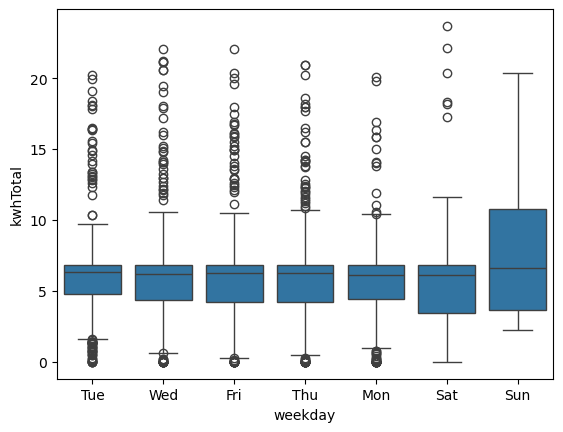

In [ ]:
sns.boxplot(x='weekday', y='kwhTotal', data=ev_df)

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

76.1% of the points cannot be placed; you may 

<Axes: xlabel='weekday', ylabel='kwhTotal'>

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

75.3% of the points cannot be placed; you may 

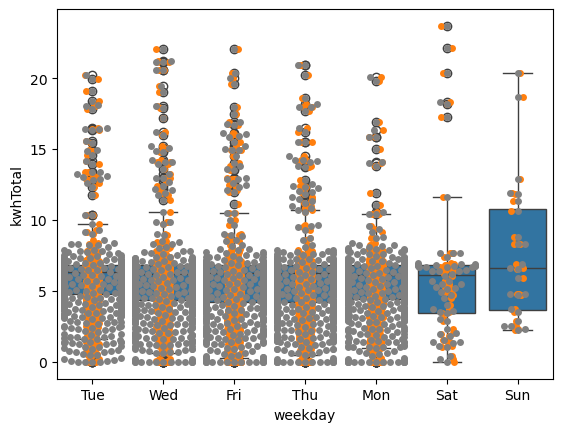

In [ ]:
# 원본데이터 + 통계량을 같이 표현한다 > boxplot + stripplot
# boxplot이 만능이 아니다.
# stripplot을 보면 실제 일요일에 충전하는량이 극히 적다는 걸 알수 있다

sns.boxplot(x='weekday', y='kwhTotal', data=ev_df)
sns.stripplot(x='weekday', y='kwhTotal', data=ev_df)
sns.swarmplot(x='weekday', y='kwhTotal', data=ev_df, color='grey', alpha=True)



In [ ]:
# boxplot이 만능이 아니다.
# swarmplot: 값이 겹치지 않는다. 다만 오래 걸린다 

In [ ]:
ev_df.head(2)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.0,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.0,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0


<Axes: xlabel='weekday', ylabel='kwhTotal'>

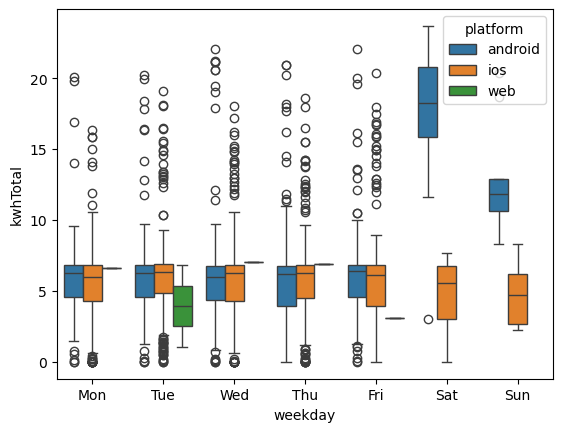

In [ ]:
weekday_order = ['Mon','Tue','Wed', 'Thu', 'Fri', 'Sat','Sun']
sns.boxplot(x='weekday'
            , y='kwhTotal'
            , data=ev_df
            , order=weekday_order
            , hue='platform')

In [ ]:
# plotly boxplot
weekday_order_px ={'weekday':weekday_order}


px.box(
    data_frame=ev_df            # 시각화에 사용할 데이터프레임 (여기서는 ev_df)
    , x='weekday'               # x축: 요일(범주형 변수) → 박스플롯을 요일별로 나눔
    , y='kwhTotal'              # y축: 전력 사용량 값(연속형 변수) → 분포를 보여줌
    , width=400                 # 그래프 전체 가로 길이(px 단위)
    , height=400                # 그래프 전체 세로 길이(px 단위)
    , points='all'              # 박스플롯 위에 모든 데이터 포인트를 점으로 표시
                                # ('outliers' → 이상치만 표시, False → 점 표시 안함)
    , category_orders=weekday_order_px  
                                # x축 카테고리(요일)의 표시 순서를 지정
                                # 예: {'weekday': ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']}
    , color='platform'
)


# 바이올린플롯

박스플롯 + 전체분포 모양 density 확인 

중앙값 + 어디에 많이 몰려있나, 피크가 어디인가? 

<Axes: xlabel='size', ylabel='tip'>

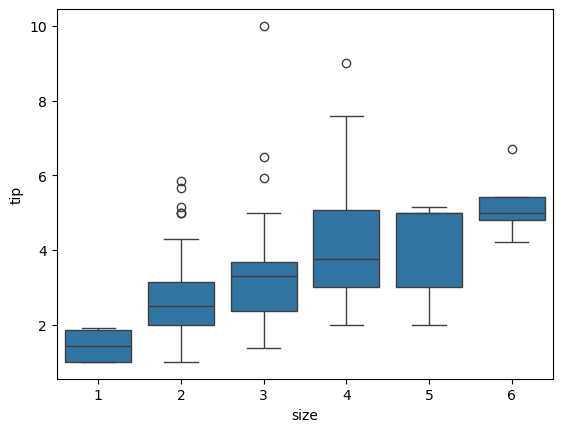

In [ ]:
sns.boxplot(x='size', y='tip', data=tip_df)

<Axes: xlabel='size', ylabel='tip'>

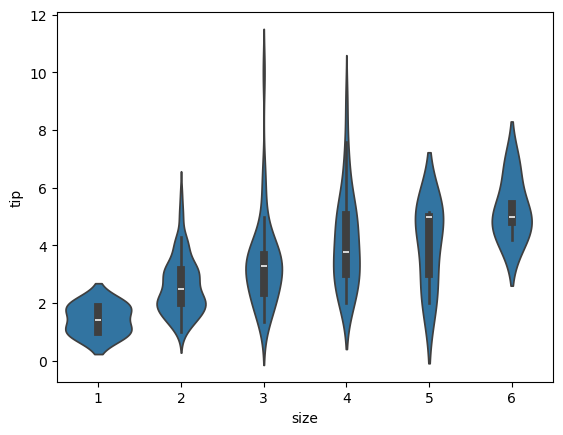

In [ ]:
sns.violinplot(x='size', y='tip', data=tip_df)

# barplot 

직선으로 오차구간 : 에러바 클수록 변동성이 크다 
막대의 크기 차이가 크지 않다 > 거의 비슷하다, 평균의 차이가 유의미하지 않다 
추가 분석 필요 - 단일 변수로 설명력이 부족, 총액, 시간대, 성별, 

<Axes: xlabel='size', ylabel='tip'>

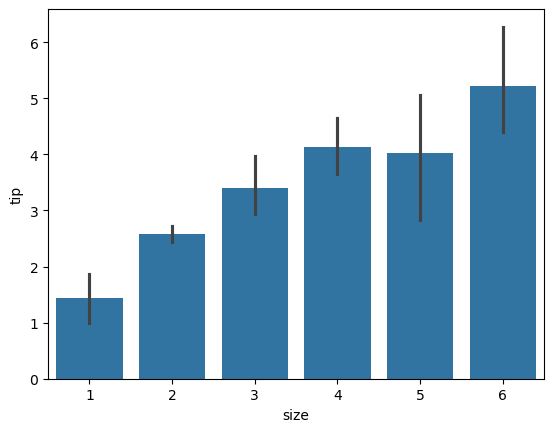

In [ ]:
sns.barplot(x='size', y='tip', data=tip_df)

In [ ]:
px.bar(data_frame=tip_df 
       , x='size'
       , y='total_bill'
       , color='time')

# hist

# countplot 

범주형 변수의 빈도수를 표현하는 차트 

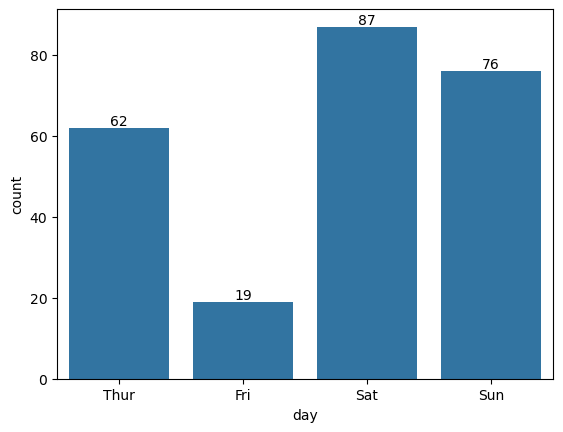

In [ ]:
ax = sns.countplot(x=tip_df['day'],legend=True)

for container in ax.containers:
    ax.bar_label(container)

# pointplot

에러바가 추가된 line차트 

<Axes: xlabel='day', ylabel='tip'>

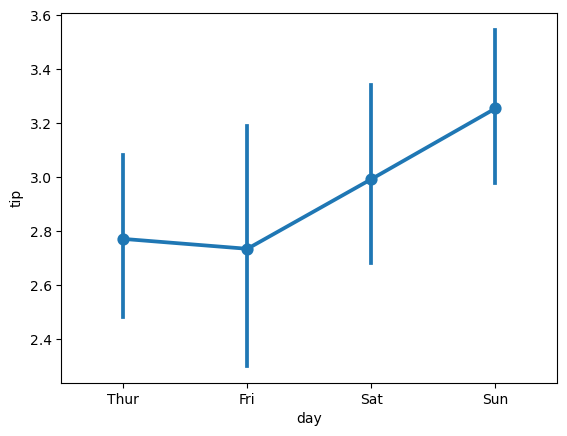

In [ ]:
sns.pointplot(x='day', y='tip', data=tip_df)

# histplot

수치형 변수들의 분포 - bin 단위로 나누어서 표현해주는 차트 

<Axes: xlabel='total_bill', ylabel='Count'>

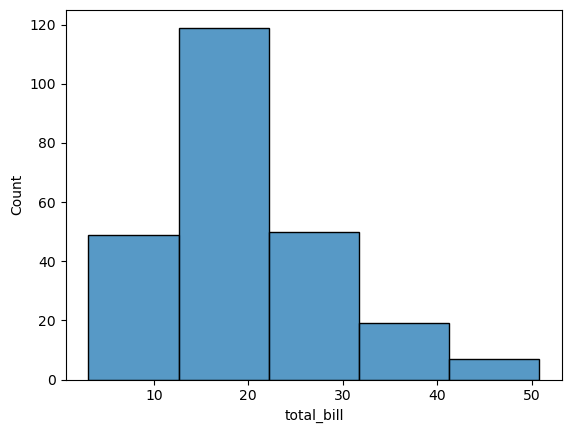

In [ ]:
sns.histplot(x='total_bill'
             , data=tip_df
             , bins=10
             , binwidth=10)

<Axes: xlabel='total_bill', ylabel='Count'>

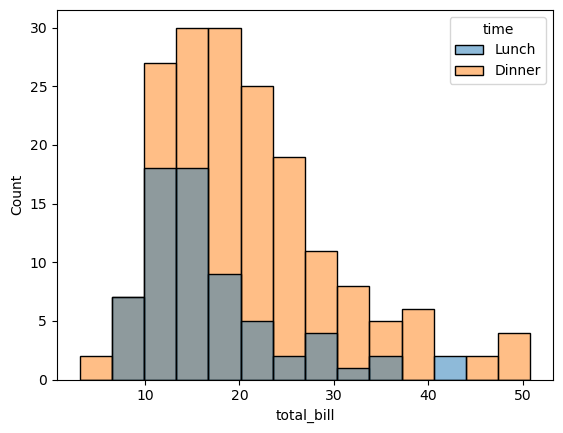

In [ ]:
sns.histplot(x='total_bill'
             , data=tip_df
             , hue='time')

<Axes: xlabel='total_bill', ylabel='Count'>

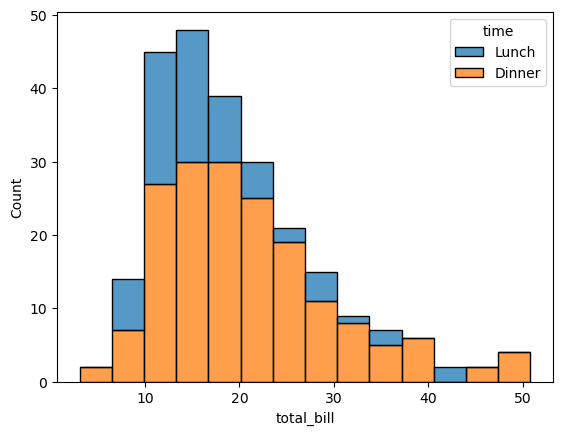

In [ ]:

sns.histplot(x='total_bill'
             , data=tip_df
             , hue='time'
             , multiple='stack')

In [ ]:
# plotly histogram

px.histogram(data_frame=tip_df
             , x='total_bill'
             , width=500
             , nbins=20) # 빈의 갯수 

In [ ]:
# plotly histogram

px.histogram(data_frame=tip_df
             , x='total_bill'
             , width=500
             , color='time'
             , barmode='overlay') # 빈의 갯수 

# heatmap 

데이터를 요약(합계, 평균)한 결과를 색깔로 시각화한 것임
요약 - 피벗테이블 (탐색) - 인사이트 시각화 히트맵 

C:\Users\Admin\AppData\Local\Temp\ipykernel_16600\2885120115.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



<Axes: xlabel='size', ylabel='day'>

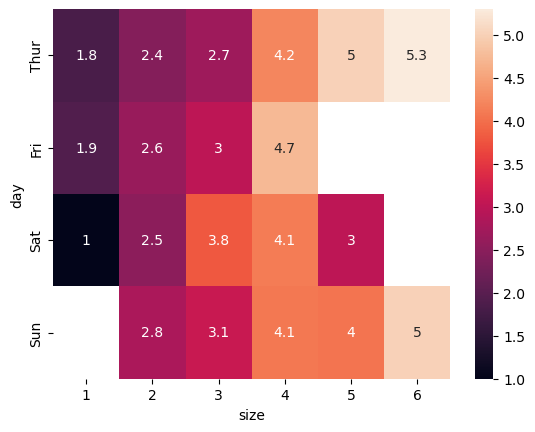

In [ ]:
# 요약 
pivot_df = tip_df.pivot_table('tip', 'day', 'size')
#시각화
sns.heatmap(pivot_df, annot=True)

<Axes: xlabel='size', ylabel='day'>

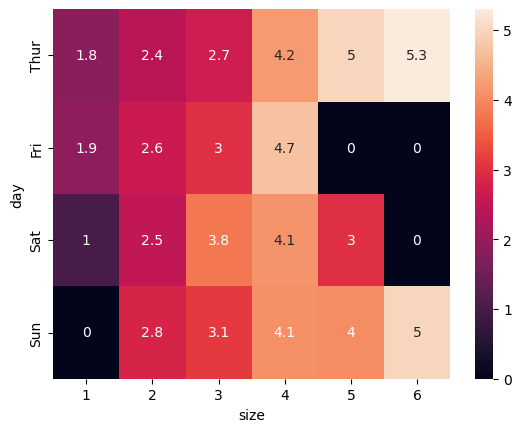

In [ ]:
pivot_df.fillna(0, inplace=True)
sns.heatmap(pivot_df, annot=True)

In [ ]:
# ploly.imshow()

px.imshow(
    pivot_df
    , x=pivot_df.columns
    , y=pivot_df.index.astype('str')
    , width= 400
    , height= 400
    , text_auto='.2e'
)


# facegrid

데이터를 범주형 변수에 다라 나눠서 각각 시각화 

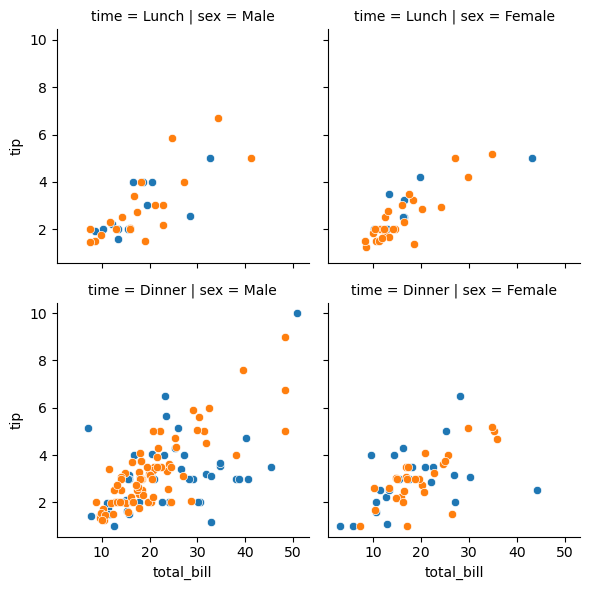

In [ ]:
g = sns.FacetGrid(tip_df, col='sex', row='time', hue='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip')

# parallel_coordinates

평행좌표 플롯 

In [ ]:
iris_df = px.data.iris()
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
import plotly.express as px  # Plotly Express 불러오기 (데이터 시각화 라이브러리)

# 병렬좌표 그래프 그리기
fig = px.parallel_coordinates(
    iris_df,                         # 사용할 데이터 (iris 데이터셋: 꽃의 특성들이 들어 있음)
    color='species_id',              # 선 색깔을 species_id(꽃의 종류를 나타내는 숫자) 기준으로 다르게 지정
    color_continuous_scale=px.colors.diverging.Tealrose,  # 색상 팔레트 설정 (Tealrose라는 색상 조합 사용)
    color_continuous_midpoint=2      # 색깔을 나눌 기준점 (species_id가 2인 값을 중심으로 색상이 갈라지도록 설정)
)

fig.show()  # 그래프 화면에 보여주기


In [ ]:
tip_df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
px.parallel_coordinates(
    tip_df
    , color='total_bill'
    , color_continuous_scale=px.colors.diverging.Tealrose
    , color_continuous_midpoint=2
)